Script to create triagle meshes with Mol*

In [1]:
from shape_utils.create_mesh import create_mesh_molstar

input_list = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples/input.txt'
output_meshes = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples'
node_setup_dir ='/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/'
data_source_dir = '/Users/gdiazleines/programs/shape-retrieval/surface_mesh/surface-calculator/examples/data/'
create_mesh_molstar(input_list, output_meshes,node_setup_dir,data_source_dir = None)

Processing 1cbs-A
Processing 1bvy-A
Processing 1bvy-B
Processing 1bvy-F
         mesh.points() -> mesh.vertices
         (silence this with vedo.core.warnings['points_getter']=False)


Initial definitions and imports 

In [3]:
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors
from shape_utils.functional_maps import calculate_functional_maps
from shape_utils.similarity_scores import calculate_geodesic_norm_score
from shape_utils.pyFM_pdbe import functional 
import os
import seaborn as sns
from matplotlib import pyplot as plt



def diff_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)

    return diff_matrix

import numpy as np

def similarity_to_diagonal(matrix):
    # Compute the Frobenius norm of the input matrix
    norm_original = np.linalg.norm(matrix)

    # Create a diagonal matrix with the same diagonal elements as the original matrix
    diagonal_matrix = np.diag(np.diag(matrix))

    # Compute the Frobenius norm of the diagonal matrix
    norm_diagonal = np.linalg.norm(diagonal_matrix)

    # Compute the similarity as the ratio of the norms
    similarity = norm_diagonal / norm_original

    return similarity

def get_non_diagonal_elements(matrix):
    non_diagonal_elements = []
    rows, cols = len(matrix), len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            if i != j:  # Exclude diagonal elements                                                                                     
                non_diagonal_elements.append(matrix[i][j])

    return non_diagonal_elements

def percentage_close_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)
    
    # Count the number of elements within the threshold
    close_elements_count = np.sum(diff_matrix < threshold)
    
    # Calculate the total number of elements in the matrix
    total_elements = rows * cols
    
    # Calculate the percentage of elements close to the identity matrix
    percentage_close = (close_elements_count / total_elements) * 100
    
    return percentage_close

def plot_array(values):
    plt.plot(values)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Plot of Array Values')
    plt.grid(True)
    plt.show()

def get_pairs(arr):
    pairs = []
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if i <= j:
                pairs.append((arr[i], arr[j]))
    return pairs
def get_pairs_two(array1, array2):
    pairs = []
    for item1 in array1:
        for item2 in array2:
            pairs.append((item1, item2))
    return pairs

Compute functional maps, corresponance matrices and point to point matrices for all pairs in a list of meshes (obj/off files):

In [2]:
input_list = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/list_two_entries.txt')
mesh_data = input_list.read().splitlines()
dim_data_matrix = len(mesh_data)
pairs_meshes = get_pairs (mesh_data)

print(len(pairs_meshes))
p2p_matrices=[]
FM_matrices = []

for pair in pairs_meshes:    
    file_mesh1 = pair[0]
    file_mesh2 = pair[1]
    
    mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
    mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

    model1 = functional.FunctionalMapping(mesh1,mesh2) 


    neigvecs = 200
    ndescr = 100
    step = 1
    n_ev = 50
    output = './example_data/'
    descr = 'WKS'
    landmarks = None

    descr1,descr2,paramlist = calculate_descriptors(model1,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
    p2p_21,FM = calculate_functional_maps(model1,n_cpus=8,refine= None)

    FM_matrices.append(FM)
    p2p_matrices.append(p2p_21)

3

Computing Laplacian spectrum
Computing 200 eigenvectors


KeyboardInterrupt: 

In [48]:
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors
from shape_utils.functional_maps import calculate_functional_maps
from shape_utils.pyFM_pdbe import functional 

import os
import seaborn as sns
from matplotlib import pyplot as plt

from shape_utils.pyFM_pdbe import eval

#input_list = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/list_two_entries.txt')
#input_list = open ('/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/test_example/list.txt')
#mesh_data = input_list.read().splitlines()
#dim_data_matrix = len(mesh_data)
#pairs_meshes = get_pairs (mesh_data)

#print(len(pairs_meshes))
#shape_diffs_ops =[]
#p2p_matrices = []
#FM_matrices = []

#file_mesh1 = mesh_data[0]

#for i in range(len(mesh_data)):
    
#file_mesh2 = mesh_data[i]    
#file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/test_example/pdb_7yie/molstar/7YIE.off'
#file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/test_example/pdb_7yid/pdb7yid.off'
file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/off_outputs/4RH3.o.off'
file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/off_outputs/4U1R.o.off'
#file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/6mkj-A.off'
#file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/6mkj-A.off'

mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

model = functional.FunctionalMapping(mesh1,mesh2) 

neigvecs = 200
ndescr = 50
step = 1
n_ev = 50
output = './example_data/'
descr = 'WKS'
landmarks = None

descr1,descr2,paramlist = calculate_descriptors(model,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
p2p_21,FM = calculate_functional_maps(model,n_cpus=8,refine= None)


#A_geod = mesh1.get_geodesic(verbose=True)
sim_score = calculate_geodesic_norm_score(FM)
print('similarity score:', sim_score)
#    shape_diffs_ops.append(D_area)
#    p2p_matrices.append(p2p_21)
#    FM_matrices.append(FM)
    


Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 140.83 s
Computing 200 eigenvectors
	Done in 144.28 s

Computing descriptors
Finished analysis of descriptors in 56.396064043045044 seconds
	Normalizing descriptors

	50 out of 50 possible descriptors kept
cpus used 8
Computing commutativity operators
	Scaling LBO commutativity weight by 1.3e-09

Optimization :
	50 Ev on source - 50 Ev on Target
	Using 50 Descriptors
	Hyperparameters :
		Descriptors preservation :1.0e+00
		Descriptors commutativity :1.0e-01
		Laplacian commutativity :1.0e-02
		Orientation preservation :0.0e+00

	Task : CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, funcall : 186, nit : 177, warnflag : 0
	Done in 1.47 seconds
 Calculating shape distance matrix
similarity score: 31.820608436650964


<AxesSubplot:>

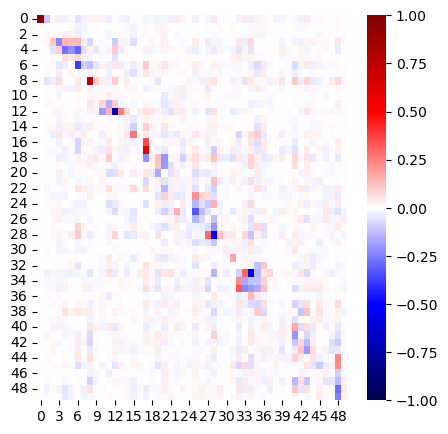

In [47]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt


def plot_mesh(myMesh,cmap=None):
   mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap
cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
double_plot(mesh1,mesh2,cmap1,cmap2)
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(FM,ax=ax1,vmax=1.0,vmin=-1.0,cmap='seismic')

Visualizing correspondance matrix 

249


<AxesSubplot:>

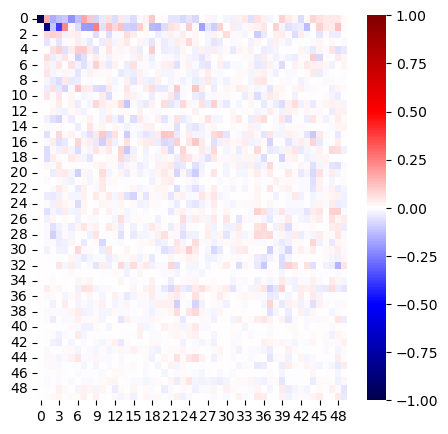

In [32]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import csv

FM_csv_files_path ='/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/output_pairs/output_pairs'
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/output_pairs/output_pairs/list_test.txt')
#list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/Q53W80/clusters_ward/cluster_2_joseph.txt')
output_path = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/Q53W80/clusters_ward/cluster_2_joseph'

#FM_csv_data = FM_csv_files_list.read().splitlines()
entry_labels = list_entries.read().splitlines()
pairs_entries = get_pairs (entry_labels)
FM_matrices = []
axes_labels = []

dim = len(entry_labels)
print(dim)

for pair in pairs_entries: 
    file_name = '{}_{}_FM.csv'.format(pair[0],pair[1])
    file_FM = os.path.join(FM_csv_files_path,file_name)
    if not os.path.exists(file_FM):
            file_name = '{}_{}_FM.csv'.format(pair[1],pair[0])
            file_FM = os.path.join(FM_csv_files_path,file_name)
    if os.path.exists(file_FM):        
        with open(file_FM) as csvfile:
           FM = list(csv.reader(csvfile))
           FM = np.asarray(FM, dtype=float)
        #fig, (ax1) = plt.subplots(1, figsize=(2,2))
        #fig.suptitle("{}_{}".format(pair[0],pair[1]), fontsize=12)
        #sns.heatmap(FM,ax=ax1,vmax=1.0,vmin=-1.0,cmap='seismic')
        #fig_out = os.path.join(output_path,'{}_{}_corr_matrix.png'.format(pair[0],pair[1]))
        #plt.savefig(fig_out)
        FM_matrices.append(FM)

#for file_FM in FM_csv_data:
#    with open(file_FM) as csvfile:
#        FM = list(csv.reader(csvfile))
#       FM = np.asarray(FM, dtype=float)
#    FM_matrices.append(FM)


FM = FM_matrices[127]


fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(FM,ax=ax1,vmax=1.0,vmin=-1.0,cmap='seismic')





Calculating scores based on geodesic distance of correspondance matrix eigenvalues spectrum 

[('1LA6', '1LA6'), ('1LA6', '2D5Z'), ('1LA6', '2F95'), ('1LA6', '2PEG'), ('1LA6', '3CEH'), ('1LA6', '3CEJ'), ('1LA6', '3CEM'), ('1LA6', '3D17'), ('1LA6', '3D1K'), ('1LA6', '3E3L'), ('1LA6', '3E3N'), ('1LA6', '3E3O'), ('1LA6', '3J8H'), ('1LA6', '3NFE'), ('1LA6', '3NG6'), ('1LA6', '3O3C'), ('1LA6', '3OO4'), ('1LA6', '3OO5'), ('1LA6', '3P5Q'), ('1LA6', '3RT1'), ('1LA6', '3SJA'), ('1LA6', '3SJB'), ('1LA6', '3SJC'), ('1LA6', '4G51'), ('1LA6', '4IRO'), ('1LA6', '4KQ2'), ('1LA6', '4ML1'), ('1LA6', '4ML6'), ('1LA6', '4ODC'), ('1LA6', '4P5X'), ('1LA6', '4P60'), ('1LA6', '4RH3'), ('1LA6', '4U1R'), ('1LA6', '4WL0'), ('1LA6', '4XZ2'), ('1LA6', '5C73'), ('1LA6', '5C76'), ('1LA6', '5C78'), ('1LA6', '5C8A'), ('1LA6', '5C8D'), ('1LA6', '5GKY'), ('1LA6', '5GKZ'), ('1LA6', '5GL0'), ('1LA6', '5GL1'), ('1LA6', '5JJF'), ('1LA6', '5SUK'), ('1LA6', '5SUL'), ('1LA6', '5UW0'), ('1LA6', '5UW1'), ('1LA6', '5UX7'), ('1LA6', '5YDZ'), ('1LA6', '5YE1'), ('1LA6', '6A6M'), ('1LA6', '6A6N'), ('1LA6', '6BCJ'), ('1LA6', 

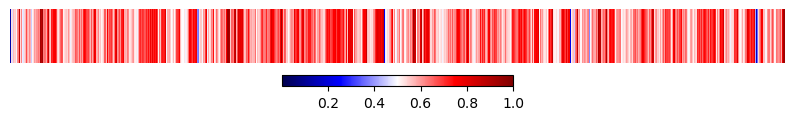

['1LA6', '6PVP']


<AxesSubplot:>

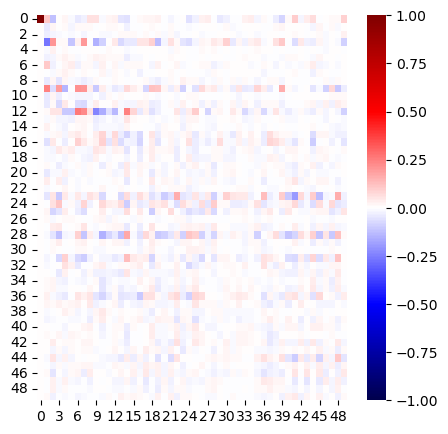

In [33]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import csv 
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

FM_csv_files_path ='/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/output_pairs/output_pairs'
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/output_pairs/output_pairs/list_test.txt')

#FM_csv_files_path = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/3UNPaccs/FM_files_3UNPaccs'
#list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/3UNPaccs/FM_files_3UNPaccs/list_entries.txt')
#list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/list_entries_P71447.txt')

#FM_csv_data = FM_csv_files_list.read().splitlines()
entry_labels = list_entries.read().splitlines()
pairs_entries = get_pairs (entry_labels)
print(pairs_entries)
FM_matrices = []
axes_labels = []

dim = len(entry_labels)
print(dim)
entries_names = []
for pair in pairs_entries: 
    file_name = '{}_{}_FM.csv'.format(pair[0],pair[1])
    file_FM = os.path.join(FM_csv_files_path,file_name)
    if os.path.exists(file_FM):
        with open(file_FM) as csvfile:
            FM = list(csv.reader(csvfile))
            FM = np.asarray(FM, dtype=float)
        FM_matrices.append(FM)
        entries_names.append([pair[0],pair[1]])

for label in entry_labels:
    axes_labels.append(label)

print(axes_labels)
    
eigenvalues_SDO_matrices = []
eigenvalues_FM_matrices = []

scores_FM =[]

for i in range(len(FM_matrices)): 

    #eigenvalues_SDO_matrices.append(eigenvalues_SDO)
    #eigenvalues_SDO = np.linalg.eigvals(shape_diffs_ops[i])

    eigenvalues_FM = np.linalg.eigvals(FM_matrices[i])
    eigenvalues_FM_matrices.append(np.real(eigenvalues_FM))
    #plot_array(np.real(eigenvalues_FM))

    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigenvalues_FM))) ** 2))

    scores_FM.append(result)

norm_scores = scores_FM/np.max(scores_FM)
# Define the range
lower_bound = 0.5
upper_bound = 0.6

# Filter elements within the range using list comprehension
#filtered_array = [x for x in norm_scores if lower_bound <= x <= upper_bound]
indexes = np.where((norm_scores >= lower_bound) & (norm_scores <= upper_bound))[0]
print(indexes)


eigenvalues_stack = np.stack(eigenvalues_FM_matrices)
df = pd.DataFrame(eigenvalues_stack, columns = [f'lambda_{i}' for i in range(eigenvalues_stack.shape[1])])
df.head()




#sym_matrix = np.zeros((dim, dim))
#row, col = np.triu_indices(dim)  # Upper triangular indices
#sym_matrix[row, col] = scores_FM
#sym_matrix[col, row] = scores_FM

#Normalise with the maximum value of the score matrix 
#maximum_score = sym_matrix.max()
#maximum_score = 1.0
#sym_matrix = np.divide(sym_matrix, maximum_score)
#fig, (ax1) = plt.subplots(1, figsize=(12, 12))
#sns.heatmap(sym_matrix,ax=ax1, vmin=0,vmax=1.0, cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)

plt.figure(figsize=(10, 1))  # adjust the size as needed
plt.imshow([norm_scores], aspect='auto', cmap='seismic')  # 'viridis' is an example colormap
plt.colorbar(orientation='horizontal')  # Add a colorbar
plt.axis('off')  # Turn off the axis
plt.show()

FM = FM_matrices[90]
print(entries_names[90])

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(FM,ax=ax1,vmax=1.0,vmin=-1.0,cmap='seismic')


Getting score matrix from Zernike descriptors 

[('8bj2', '8bj2'), ('8bj2', '4ml1'), ('8bj2', '6zxb'), ('8bj2', '6qma'), ('8bj2', '7s9c'), ('8bj2', '6nt6'), ('8bj2', '6lcp'), ('8bj2', '7b7z'), ('8bj2', '6a6n'), ('8bj2', '7vgi'), ('8bj2', '7py4'), ('8bj2', '4p60'), ('8bj2', '7c7q'), ('8bj2', '6uo8'), ('8bj2', '5c76'), ('8bj2', '7p7d'), ('8bj2', '3o3c'), ('8bj2', '7rhj'), ('8bj2', '6yvu'), ('8bj2', '3ng6'), ('8bj2', '3nfe'), ('8bj2', '6ddb'), ('8bj2', '6ddk'), ('8bj2', '6ddq'), ('8bj2', '6ddc'), ('8bj2', '6ddl'), ('8bj2', '6ddo'), ('8bj2', '3sjb'), ('8bj2', '3sja'), ('8bj2', '2d5z'), ('8bj2', '2peg'), ('8bj2', '4odc'), ('8bj2', '7n17'), ('8bj2', '7n15'), ('8bj2', '7dxb'), ('8bj2', '7t3q'), ('8bj2', '7qds'), ('8bj2', '8eu3'), ('8bj2', '8ev9'), ('8bj2', '7d3e'), ('8bj2', '8c76'), ('8bj2', '6bco'), ('8bj2', '6bcq'), ('8bj2', '6zm1'), ('8bj2', '7mil'), ('8bj2', '6pvm'), ('8bj2', '6pvn'), ('8bj2', '6pvo'), ('8bj2', '8e4n'), ('8bj2', '8e4o'), ('8bj2', '6bqr'), ('8bj2', '8sia'), ('8bj2', '8si8'), ('8bj2', '8si3'), ('8bj2', '8si2'), ('8bj2', 

<AxesSubplot:>

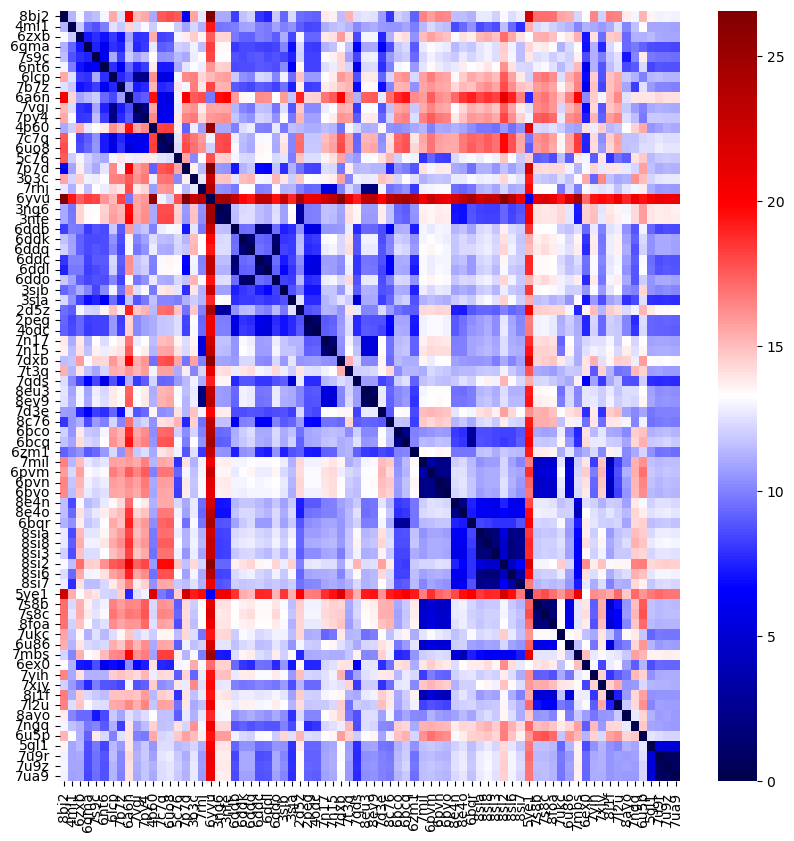

In [54]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import csv 
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

#scores_file = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_ply_files/output_chains/fullatom_prediction_distance.txt')
#list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_ply_files/list_3unp_accs_entries.txt')

scores_file = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/outputs/ply_outputs/output/fullatom_prediction.txt')
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/complexes/functional_state_1.txt')

scores_entries = scores_file.read().splitlines()
entry_labels = list_entries.read().splitlines()
pairs_entries = get_pairs (entry_labels)


axes_labels = []
scores_zernike = []

for label in entry_labels:
    axes_labels.append(label)

dim = len(entry_labels)

print(pairs_entries)

for j in pairs_entries:
    j_inv = (j[1],j[0])
    for line in scores_entries:
        p = line.split()
        pair_score = (p[0].lower(),p[1].lower())
        score_zernike = p[2] 
        if j==pair_score or j_inv==pair_score:
            scores_zernike.append(score_zernike)
print(scores_zernike)           
sym_matrix = np.zeros((dim, dim))
row, col = np.triu_indices(dim)  # Upper triangular indices
sym_matrix[row, col] = scores_zernike
sym_matrix[col, row] = scores_zernike
print(sym_matrix.max())
score_max = sym_matrix.max() 
#score_max = 1.0 
fig, (ax1) = plt.subplots(1, figsize=(10, 10))
sns.heatmap(sym_matrix,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)



Agglomerative clustering 

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


cluster no. 1
7c6j-A
7c6j-B
7c6l-A
7c6l-B
7c6n-A
7c6n-B
cluster no. 2
7c66-A
7c66-B
7c67-A
7c67-B
7c68-A
7c68-B
7c69-A
7c69-B
cluster no. 3
7c6k-A
7c6m-A
7c6r-A
7c6t-A
7c6v-A
7c6v-B
7c6v-C
7c6w-A
cluster no. 4
7c63-A
7c64-A
7c64-B
7c6f-A
7c6g-A
7c6g-B
7c6h-A
7c6h-B
7c6i-A
7c6i-B
7c6x-A
7c6x-B
7c6x-C
7c6x-D
7c6x-E
7c6x-F
7c6x-G
7c6x-H
7c6x-I
7c6x-J
7c6x-K
7c6x-L
7c6y-A
7c6z-A
7c6z-B
7c70-A
7c70-B
cluster no. 5
6mka-A
6mkf-A
6mkg-A
6mkj-A
cluster no. 6
2wf5-A
2wf8-A
5olx-A
5oly-A
5oly-G
6hdg-A
cluster no. 7
2wf9-A
cluster no. 8
6h8u-A
6h8v-A
6h8v-B
6h8w-A
6h8x-A
6h8z-A
6h91-A
6h92-A
6h93-A
6h94-A
6hdf-B
6hdh-A
6hdi-A
cluster no. 9
2wfa-A
2whe-A
5olw-A
5olw-B
cluster no. 10
6h8x-B
6h8y-A
6h91-B
6h92-B
6h93-B
6hdf-A
6hdh-B
6hdi-B
optimal number of clusters 10


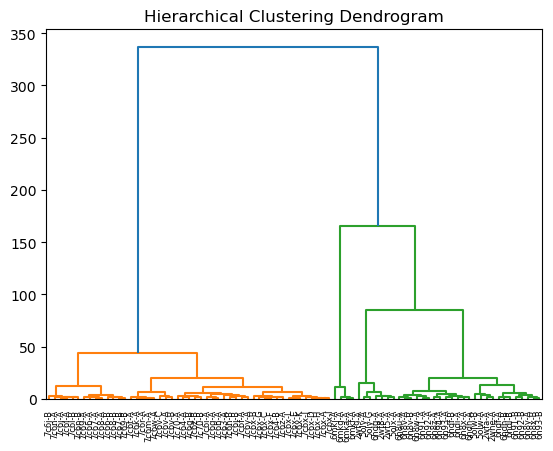

In [139]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from scipy.cluster.hierarchy import dendrogram, from_mlab_linkage, cut_tree, leaves_list, set_link_color_palette, to_tree, fcluster
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_samples
import scipy.stats as st
import json
import operator
import pandas as pd
import itertools

def linkage_matrix(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix
    # Plot the corresponding dendrogram
    #dendrogram(linkage_matrix, **kwargs)

def two_gap_diff_stat(model, max_k,dist):
    clusters = linkage_matrix(model)
    dist = pd.DataFrame(dist)
    # cluster levels over from 1 to N-1 clusters
    cluster_lvls = pd.DataFrame(cut_tree(clusters))
    num_k = cluster_lvls.columns  # save column with number of clusters
    # reverse order to start with 1 cluster
    cluster_lvls = cluster_lvls.iloc[:, ::-1]
    cluster_lvls.columns = num_k  # set columns to number of cluster
    W_list = []

    # get within-cluster dissimilarity for each k
    for k in range(min(len(cluster_lvls.columns), max_k)):
        level = cluster_lvls.iloc[:, k]  # get k clusters
        D_list = []  # within-cluster distance list

        for i in range(np.max(level.unique()) + 1):
            cluster = level.loc[level == i]
            # Based on correlation distance
            cluster_dist = dist.loc[cluster.index,
                                    cluster.index]  # get distance
            cluster_pdist = squareform(cluster_dist, checks=False)
            if cluster_pdist.shape[0] != 0:
                D = np.nan_to_num(cluster_pdist.mean())
                D_list.append(D)  # append to list

        W_k = np.sum(D_list)
        W_list.append(W_k)

    W_list = pd.Series(W_list)
    n = dist.shape[0]
    limit_k = int(min(max_k, np.sqrt(n)))
    gaps = W_list.shift(2) + W_list - 2 * W_list.shift(1)
    gaps = gaps[0:limit_k]
    if gaps.isna().all():
        k = len(gaps)
    else:
        k = int(gaps.idxmax() + 2)

    return k


def std_silhouette_score(model, max_k,dist):
    clusters = linkage_matrix(model)
    dist = pd.DataFrame(dist)
    # cluster levels over from 1 to N-1 clusters
    cluster_lvls = pd.DataFrame(cut_tree(clusters))
    num_k = cluster_lvls.columns  # save column with number of clusters
    # reverse order to start with 1 cluster
    cluster_lvls = cluster_lvls.iloc[:, ::-1]
    cluster_lvls.columns = num_k  # set columns to number of cluster
    scores_list = []

    # get within-cluster dissimilarity for each k
    for k in range(2, min(len(cluster_lvls.columns), max_k)):
        level = cluster_lvls.iloc[:, k]  # get k clusters
        b = silhouette_samples(dist, level)
        scores_list.append(b.mean() / b.std())

    scores_list = pd.Series(scores_list)
    n = dist.shape[0]
    limit_k = int(min(max_k, np.sqrt(n)))
    scores_list = scores_list[0:limit_k]
    if scores_list.isna().all():
        k = len(scores_list)
    else:
        k = int(scores_list.idxmax() + 2)

    return k


def find_optimal_num_clusters(model, dist, max_k=10, ktype="d",k=None):
    if k is None:
        if ktype == "s":
            k = std_silhouette_score(model, max_k,dist)
        else:
            k = two_gap_diff_stat(model, max_k,dist)

    return k


average_linkage_average = cluster.AgglomerativeClustering(
        linkage="ward",
        #metric = 'precomputed',
        compute_distances = True,
        compute_full_tree = True, 
        distance_threshold = 0.8,
        n_clusters= None,
    )

clustering_av = average_linkage_average.fit(sym_matrix)
#clusters = clustering_av.n_clusters_

#print('no. of clusters',clusters)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
link_matrix = linkage_matrix(clustering_av)



k = find_optimal_num_clusters(clustering_av, sym_matrix,max_k=1000, ktype="d", k=None)
clustering_inds = fcluster(link_matrix, k, criterion="maxclust")
clusters = {i: [] for i in range(min(clustering_inds), max(clustering_inds) + 1)}
for i, v in enumerate(clustering_inds):
        clusters[v].append(i)

clusters_all = []
for i in range(1,len(clusters)+1):
    print('cluster no.', i)
    cluster_entries = []
    cluster = clusters[i]
    for j in cluster:
        print(axes_labels[j])
        cluster_entries.append(axes_labels[j])  
    clusters_all.append(cluster_entries)
    
print('optimal number of clusters',k)
dendrogram(link_matrix,truncate_mode = "level", p=50,labels=axes_labels)
plt.show()

/var/folders/pg/t8pwfjqn3r17q15g5ft5pz400000gp/T/ipykernel_89660/3300953112.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


(<Figure size 1200x500 with 1 Axes>, <AxesSubplot:>)

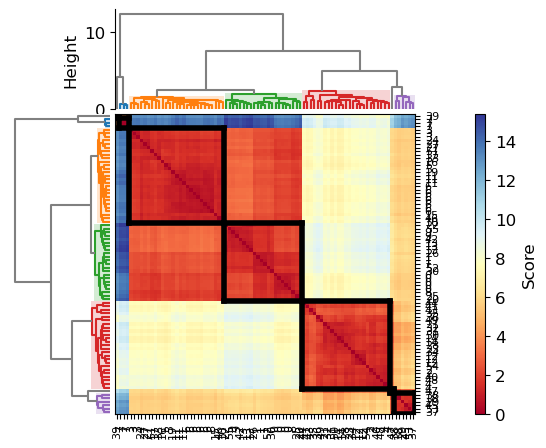

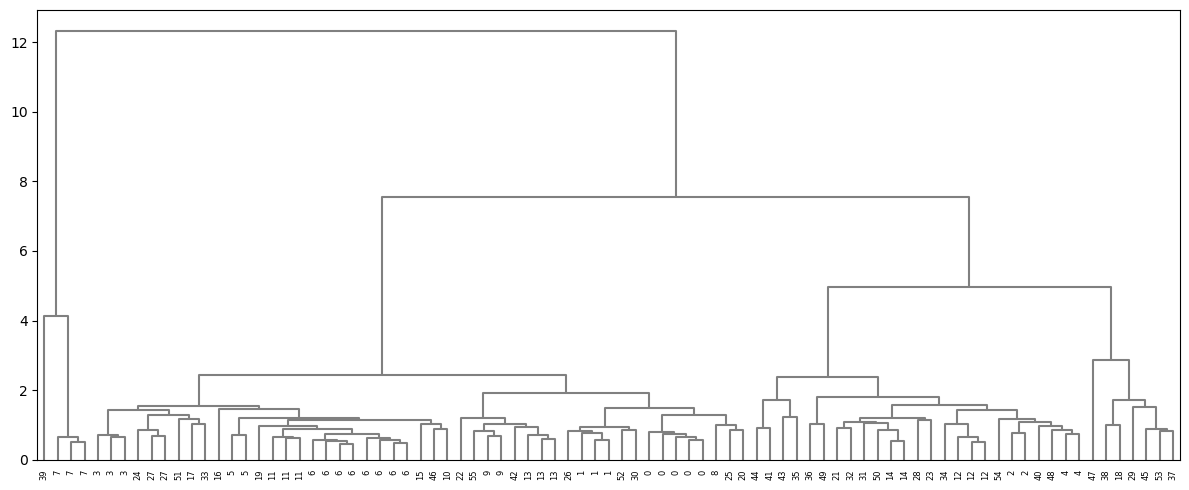

In [129]:
def color_list(k):
    colors = []

    if k <= 10:
        for i in range(10):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab10").colors[i]))
    elif k <= 20:
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20").colors[i]))
    elif k <= 40:
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20").colors[i]))
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20b").colors[i]))
    else:
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20").colors[i]))
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20b").colors[i]))
        for i in range(20):
            colors.append(mpl.colors.rgb2hex(plt.get_cmap("tab20c").colors[i]))
        if k / 60 > 1:
            colors = colors * int(np.ceil(k / 60))

    return colors

def plot_mtx_dend(
    model, dist, width=12, height=12, k=None, ktype="d", cmap="RdYlBu", max_k=None, show_clusters=True, title="", linecolor="black", dend=True, dend_ylabel="Height", cbar_label="Score", mtx_labelsize=20, titlesize=20, dend_labelsize=15, dend_ticksize=15, cbar_labelsize=15, cbar_ticksize=15, cluster_linewidth=4, ** kwargs
):

    if max_k is None:
        max_k = int(np.sqrt(model.labels_))

    plt.figure()
    fig = plt.gcf()
    fig.set_figwidth(width)
    fig.set_figheight(height)

    labels = np.array(model.labels_)
    dist = pd.DataFrame(dist)
    dim = len(dist)

    vmin, vmax = 0, dist.to_numpy().max()

    clustering = linkage_matrix(model)

    # Ordering clusterings
    permutation = leaves_list(clustering)
    permutation = permutation.tolist()
    ordered_codep = dist.to_numpy()[permutation, :][:, permutation]

    # optimal number of clusters
    k = find_optimal_num_clusters(model, sym_matrix,max_k=max_k, ktype=ktype, k=k)

    clustering_inds = fcluster(clustering, k, criterion="maxclust")
    clusters = {i: []
                for i in range(min(clustering_inds), max(clustering_inds) + 1)}
    for i, v in enumerate(clustering_inds):
        clusters[v].append(i)

    
    ax = fig.add_axes([0.3, 0.1, 0.6, 0.6])

    im = ax.pcolormesh(ordered_codep, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(dist.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dist.shape[0]) + 0.5, minor=False)
    ax.tick_params(labelsize=mtx_labelsize)

    ax.set_xticklabels(labels[permutation], rotation=90, ha="center")
    ax.set_yticklabels(labels[permutation], va="center")
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylim(ax.get_ylim()[::-1])

    flag = False
    if show_clusters is True:
        if linecolor is None:
            linecolor = "fuchsia"
            flag = True
        elif linecolor is not None:
            flag = True

    if flag:
        N = len(permutation)
        for cluster_id, cluster in clusters.items():
            amin = permutation.index(cluster[0])
            xmin, xmax = amin, amin + len(cluster)
            ymin, ymax = amin, amin + len(cluster)

            for i in cluster:
                a = permutation.index(i)
                if a < amin:
                    xmin, xmax = a, a + len(cluster)
                    ymin, ymax = a, a + len(cluster)
                    amin = a

            ax.axvline(
                x=xmin,
                ymin=(N - ymin) / dim,
                ymax=(N - ymax) / dim,
                linewidth=cluster_linewidth,
                color=linecolor,
            )
            ax.axvline(
                x=xmax,
                ymin=(N - ymin) / dim,
                ymax=(N - ymax) / dim,
                linewidth=cluster_linewidth,
                color=linecolor,
            )
            ax.axhline(
                y=ymin, xmin=xmin / dim, xmax=xmax / dim, linewidth=cluster_linewidth, color=linecolor
            )
            ax.axhline(
                y=ymax, xmin=xmin / dim, xmax=xmax / dim, linewidth=cluster_linewidth, color=linecolor
            )

    axcolor = fig.add_axes([1.02, 0.1, 0.02, 0.6])
    cbar = plt.colorbar(im, cax=axcolor)
    cbar.set_label(cbar_label, rotation=90, fontsize=cbar_labelsize)
    cbar.ax.tick_params(labelsize=cbar_ticksize)

    if dend == True:
        ax1 = fig.add_axes([0.3, 0.71, 0.6, 0.2])

        if show_clusters is False:
            color_threshold = 0
        elif show_clusters is True:
            root, nodes = to_tree(clustering, rd=True)
            nodes = [i.dist for i in nodes]
            nodes.sort()
            nodes = nodes[::-1][: k - 1]
            color_threshold = np.min(nodes)
            colors = color_list(k)
            set_link_color_palette(colors)

        dendrogram(
            clustering,
            color_threshold=color_threshold,
            above_threshold_color="grey",
            ax=ax1,
        )
        set_link_color_palette(None)
        ax1.xaxis.set_major_locator(
            mticker.FixedLocator(np.arange(dist.shape[0])))
        ax1.set_xticklabels(labels[permutation], rotation=90, ha="center")

        if show_clusters is True:
            i = 0
            for coll in ax1.collections[
                :-1
            ]:  # the last collection is the ungrouped level
                xmin, xmax = np.inf, -np.inf
                ymax = -np.inf
                for p in coll.get_paths():
                    (x0, _), (x1, y1) = p.get_extents().get_points()
                    xmin = min(xmin, x0)
                    xmax = max(xmax, x1)
                    ymax = max(ymax, y1)
                rec = plt.Rectangle(
                    (xmin - 4, 0),
                    xmax - xmin + 8,
                    ymax * 1.05,
                    facecolor=colors[i],  # coll.get_color()[0],
                    alpha=0.2,
                    edgecolor="none",
                )
                ax1.add_patch(rec)
                i += 1

        ax1.set_xticks([])
        ax1.set_ylabel(dend_ylabel, fontsize=dend_labelsize)
        ax1.tick_params(axis="y", labelsize=dend_ticksize)
        ax1.yaxis.get_offset_text().set_fontsize(dend_ticksize)
        # ax1.set_yticks([])

        for i in {"right",  # "left",
                  "top", "bottom"}:
            side = ax1.spines[i]
            side.set_visible(False)

        ax2 = fig.add_axes([0.09, 0.1, 0.2, 0.6])

        if show_clusters is True:
            set_link_color_palette(colors)

        dendrogram(
            clustering,
            color_threshold=color_threshold,
            above_threshold_color="grey",
            orientation="left",
            ax=ax2,
        )
        set_link_color_palette(None)

        ax2.xaxis.set_major_locator(
            mticker.FixedLocator(np.arange(dist.shape[0])))
        ax2.set_xticklabels(labels[permutation], rotation=90, ha="center")
        ax2.set_ylim(ax2.get_ylim()[::-1])

        if show_clusters is True:
            i = 0
            # the last collection is the ungrouped level
            for coll in ax2.collections[:-1]:
                ymin, ymax = np.inf, -np.inf
                xmax = -np.inf
                for p in coll.get_paths():
                    (_, y0), (x1, y1) = p.get_extents().get_points()
                    ymin = min(ymin, y0)
                    ymax = max(ymax, y1)
                    xmax = max(xmax, x1)
                rec = plt.Rectangle(
                    (0, ymin - 4),
                    xmax * 1.05,
                    ymax - ymin + 8,
                    facecolor=colors[i],  # coll.get_color()[0],
                    alpha=0.2,
                    edgecolor="none",
                )
                ax2.add_patch(rec)
                i += 1

        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2.set_yticklabels([])
        for i in {"right", "left", "top", "bottom"}:
            side = ax2.spines[i]
            side.set_visible(False)

    if dend == True:
        ax1.set_title(title, fontsize=titlesize)
    elif dend == False:
        ax.set_title(title, fontsize=titlesize)

    try:
        fig.tight_layout()
    except:
        pass

    return fig, ax

def plot_dendrogram(model, linkage_matrix=None, width=12, height=5, k=10, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    if linkage_matrix == None:
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)

    fig = plt.subplots()
    fig = plt.gcf()
    ax = fig.gca()
    fig.set_figwidth(width)
    fig.set_figheight(height)
    
    permutation = leaves_list(linkage_matrix)
    permutation = permutation.tolist()
    
    root, nodes = to_tree(linkage_matrix, rd=True)
    nodes = [i.dist for i in nodes]
    nodes.sort()
    nodes = nodes[::-1][: k - 1]
    if nodes:
        color_threshold = np.min(nodes)
        colors = color_list(k)  # color list
        set_link_color_palette(colors)
    else:
        color_threshold = None
        colors = color_list(1)  # color list
        set_link_color_palette(colors)

    dendrogram(
        linkage_matrix, color_threshold=color_threshold, above_threshold_color="grey", ax=ax, **kwargs
    )
    set_link_color_palette(None)

    labels = model.labels_

    plabels = [labels[i] for i in permutation]
    ax.set_xticklabels(plabels, rotation=90, ha="center")

    i = 0
    # the last collection is the ungrouped level
    for coll in ax.collections[:-1]:
        xmin, xmax = np.inf, -np.inf
        ymax = -np.inf
        for p in coll.get_paths():
            (x0, _), (x1, y1) = p.get_extents().get_points()
            xmin = min(xmin, x0)
            xmax = max(xmax, x1)
            ymax = max(ymax, y1)
        rec = plt.Rectangle(
            (xmin - 4, 0),
            xmax - xmin + 8,
            ymax * 1.05,
            facecolor=colors[i],  # coll.get_color()[0],
            alpha=0.2,
            edgecolor="none",
        )
        ax.add_patch(rec)
        i += 1

    try:
        fig.tight_layout()
    except:
        pass

    return fig, ax

plot_mtx_dend(clustering_av, sym_matrix, width=5, height=5, 
              k=k, ktype="d", cmap="RdYlBu", max_k=10000, 
              show_clusters=True, title="", linecolor="black", 
              dend=True, dend_ylabel="Height", cbar_label="Score", 
              mtx_labelsize=8, titlesize=20, dend_labelsize=12, 
              dend_ticksize=12, cbar_labelsize=12, cbar_ticksize=12, 
              cluster_linewidth=4,truncate_mode = "level", p=50
)

plot_dendrogram(clustering_av, linkage_matrix=None, width=12, height=5, k=10000, truncate_mode = "level", p=50)

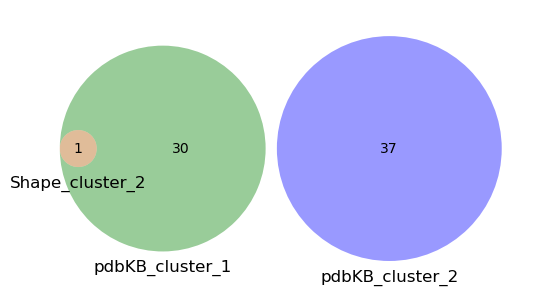

In [142]:
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn3, venn2
import numpy as np
list_1 = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/P71447/pdbeKB_clusters/cluster1.txt')
list_2 = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/output_csv_files/P71447/pdbeKB_clusters/cluster2.txt')
cluster_jo_1 = list_1.read().splitlines()
cluster_jo_2 = list_2.read().splitlines()
set1 = set(clusters_all[3])
set2 = set(cluster_jo_1)
set3 = set(cluster_jo_2)

venn3([set1, set2, set3], ('Shape_cluster_2','pdbKB_cluster_1','pdbKB_cluster_2'))
plt.show()

In [6]:
# Fit a linear curve to every row of the dataframe and divide every value in the row by the slope of the curve

slope = []
intercept = []
for i in range(0, len(df)):
    x = np.arange(0, len(df.columns))
    y = df.iloc[i].values
    m, b = np.polyfit(x, y, 1)
    slope.append(m)
    intercept.append(b)
print(slope)
df = df.div(slope, axis=0)

[0.05445648461086935, -0.0042795833147577155, -0.0034052919244836255, -0.0010243593808870613, -0.004515491560017222, -0.0019261494108588583, -0.003833878981799305, -0.0031618022002973087, -0.0031982933341826443, -0.0027662623932901364, -0.0036592378994715095, -0.0004927174848345733, -0.0032974256348336528, -0.004358014011581728, -0.0038847115174580923, -0.0015088464529189954, -0.0037004965559304707, -0.0027006559648692077, -0.0012413771394704743, -0.0024997075324965424, -0.0022114996163083555, -0.0003996561307875856, -0.0021397160379645745, -0.0024322397426931575, -0.0022839679201681023, -0.0031953555127175043, -0.002317521122636373, -0.004097297233332318, -0.0028051872247050855, -0.0029824955251373892, -0.00221594480262684, -0.003662484454008992, -0.0020268743361755233, -0.00034732737571402985, -0.00029738500705119535, -0.0019417187773638836, 0.0003699305947155179, -0.0008048341291473998, -0.0009002474715508684, -0.0005232033612789791, -0.0004980005698277293, -0.0018912968825288057, -

In [95]:
import tqdm
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 



x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

finalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf.head()


,principal component 1,principal component 2
0,-3.397231,5.554309
1,-5.639050,-5.057551
2,6.197325,-2.453644
3,2.838956,1.956887


In [96]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))

[[1.8257921122740651e-09, 43.48121389821432, 42.64941902254939, 52.46482986188295], [43.48030723259374, 3.2718795823489943e-09, 42.765212758725596, 51.85841720331586], [42.649653820798115, 42.76475768884572, 8.943423830172373e-11, 50.438383632564175], [52.46482986193826, 51.85841720270754, 50.43838363258362, 4.314184393666809e-15]]


<AxesSubplot:>

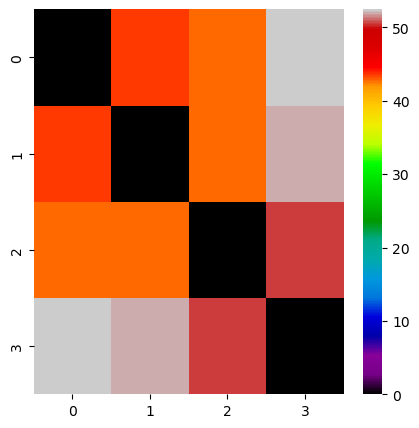

In [179]:
import numpy as np
from numpy.linalg import inv
import pandas as pd 
import matplotlib.pyplot as plt



invD_set = []
DinvD_set = []
eigenvalues_DinvD = []
geo_distances = []

for i in range(len(shape_diffs_ops)):

    invD_area = inv(shape_diffs_ops[i])
    invD_set.append(invD_area)

pairs = get_pairs_two(shape_diffs_ops,invD_set)

dist_mat_dim = (len(shape_diffs_ops))

for pair in pairs:
    DinvD = np.matmul(pair[0],pair[1])
    DinvD_set.append(DinvD)

for elem in DinvD_set:
    eigenvalues = np.linalg.eigvals(elem)
    eigenvalues_DinvD.append(np.real(eigenvalues))

#plot_array(np.real(eigenvalues_DinvD[1328]))

for eigs in eigenvalues_DinvD:
    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigs))) ** 2))
    geo_distances.append(result)

dist_matrix =[]
dist_matrix_row = []

group_size = dist_mat_dim
dist_matrix = [geo_distances[i:i+group_size] for i in range(0, len(geo_distances), group_size)]

print(dist_matrix)

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(dist_matrix,ax=ax1,cmap ='nipy_spectral')

